In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from model_evaluate import evaluate_model

In [3]:
# Step 2: Load Train/Test Datasets (Backward Compatible Split)
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

Train shape: (27215, 10)
Test shape: (11664, 10)


In [4]:
# Step 3: Define Feature Columns and Targets
feature_columns = ['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']
target_columns = ['PV_production', 'Wind_production']

# Separate Inputs (X) and Targets (y)
X_train = train_data[feature_columns]
y_train = train_data[target_columns]

X_test = test_data[feature_columns]
y_test = test_data[target_columns]

In [5]:
# Step 4: Initialize and Train Linear Regression Model
linear_regression_model_function = LinearRegression()
linear_regression_model_function.fit(X_train, y_train)

LinearRegression()

In [6]:
# Step 5: Predict on Test Data
y_pred = linear_regression_model_function.predict(X_test)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LINEAR REGRESSION MODEL PERFORMANCE
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--- Linear Regression - PV Production ---
MAE: 784.187
MSE: 1338366.155
RMSE: 1156.878
R²: 0.903
Adjusted R²: 0.903
Explained Variance: 0.903
Sample Size: 11664
Visualization Sample: 5,000 points


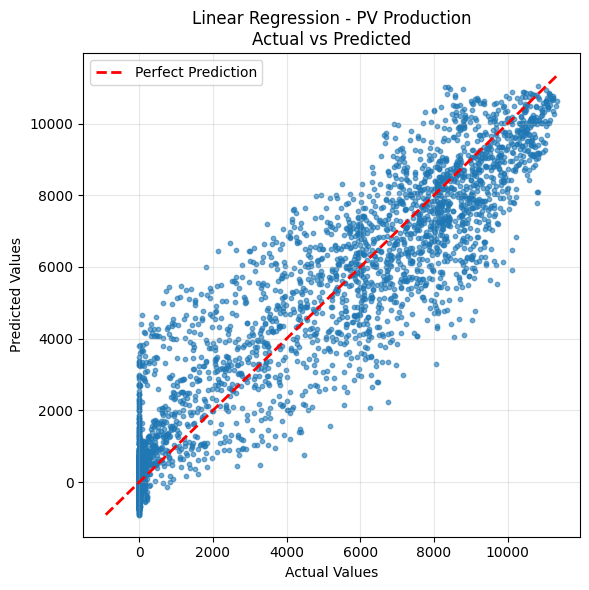

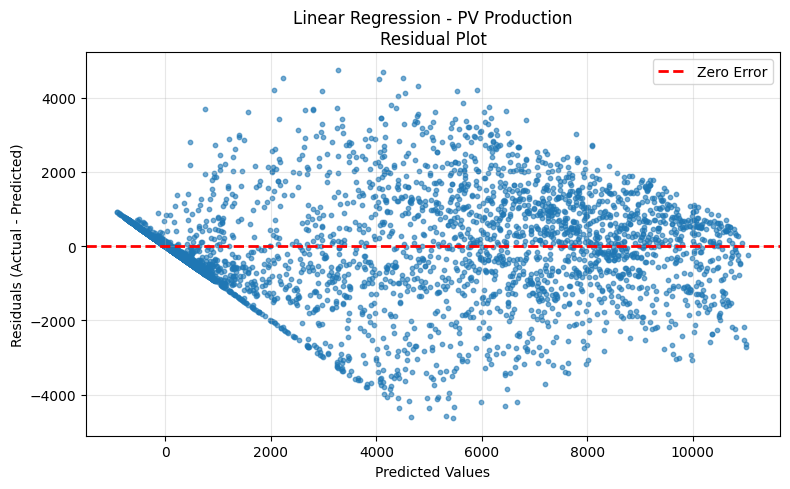

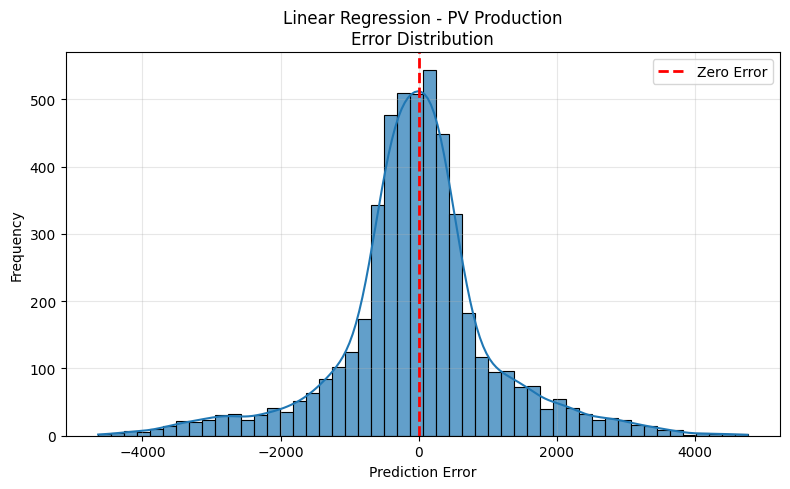

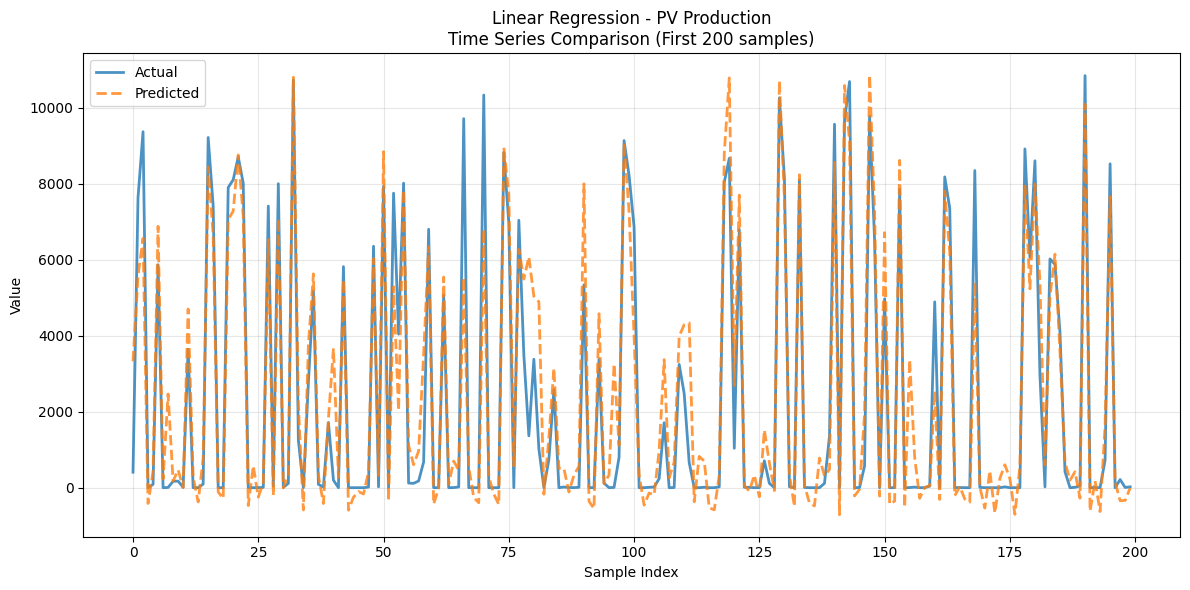

--- Linear Regression - Wind Production ---
MAE: 692.397
MSE: 733437.892
RMSE: 856.410
R²: 0.481
Adjusted R²: 0.481
Explained Variance: 0.481
Sample Size: 11664
Visualization Sample: 5,000 points


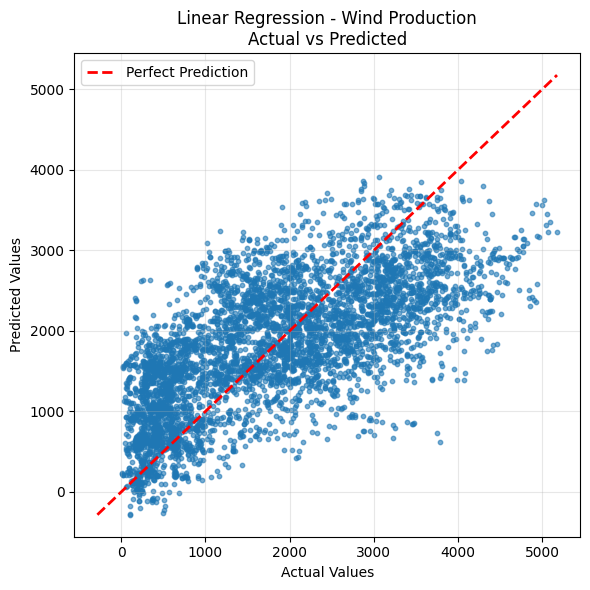

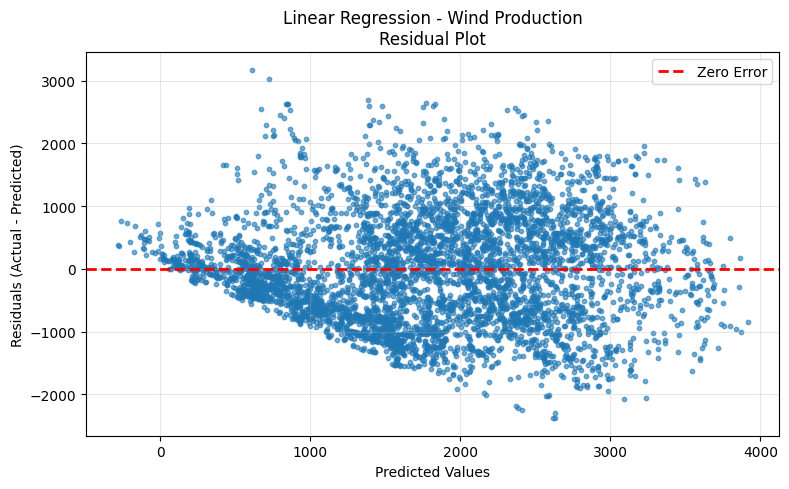

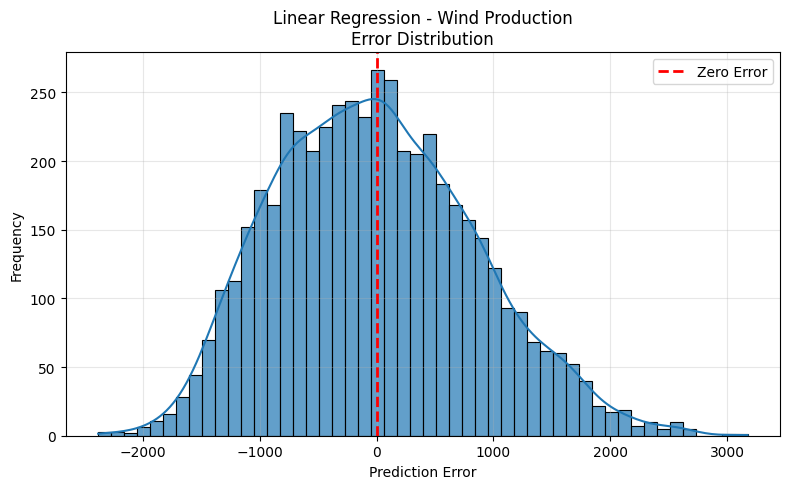

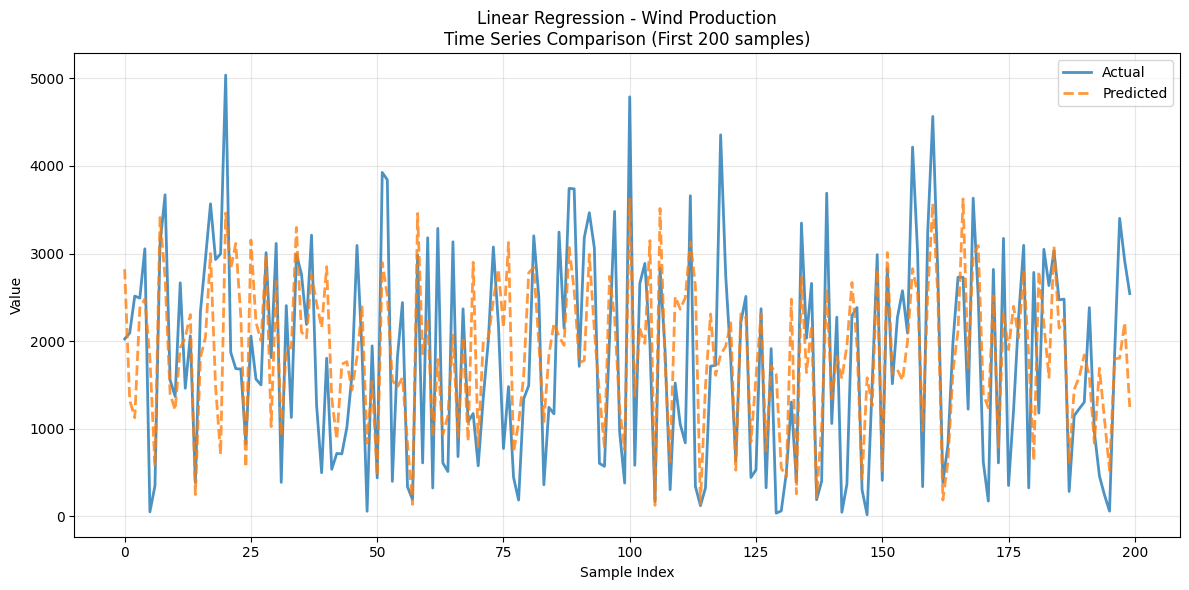


Evaluation completed.


In [7]:
# Step 6: Evaluate Model for Each Target Variable
print("\n" + "~"*60)
print("LINEAR REGRESSION MODEL PERFORMANCE")
print("~"*60)

# Evaluate for PV Production
evaluate_model(
    y_test['PV_production'],
    y_pred[:, 0],
    model_name="Linear Regression",
    target_name="PV Production"
)

# Evaluate for Wind Production
evaluate_model(
    y_test['Wind_production'],
    y_pred[:, 1],
    model_name="Linear Regression",
    target_name="Wind Production"
)

print("\nEvaluation completed.")